<a href="https://colab.research.google.com/github/ylnaud/colab/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar las versiones necesarias de las librerías
!pip uninstall pandas -y
!pip install pandas==2.0.3
!pip install numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 -q --user

Found existing installation: pandas 2.0.3
Uninstalling pandas-2.0.3:
  Successfully uninstalled pandas-2.0.3
  Using cached pandas-2.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)


In [ ]:
# Importar las librerías necesarias para la manipulación y visualización de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Comando para mostrar gráficos en Jupyter Notebooks
%matplotlib inline

In [ ]:
# Montar Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer los datos
data = pd.read_csv('/content/drive/MyDrive/python/foodhub_order.csv')

In [ ]:
# Ver las primeras 5 filas del dataset
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Pregunta 1: ¿Cuántas filas y columnas tiene el conjunto de datos?
print('Hay', data.shape[0], 'filas y', data.shape[1], 'columnas en el conjunto de datos.')

Hay 1898 filas y 9 columnas en el conjunto de datos.


In [ ]:
# Pregunta 2: ¿Cuáles son los tipos de datos de las diferentes columnas en el conjunto de datos?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
# Observaciones sobre los tipos de datos
# Convertir 'order_id' y 'customer_id' a tipo de dato string
data[['order_id', 'customer_id']] = data[['order_id', 'customer_id']].astype(str)
data.dtypes

order_id                  object
customer_id               object
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [ ]:
# Pregunta 3: ¿Hay valores faltantes en los datos? Si es así, tratarlos adecuadamente.
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
# Reemplazar 'Not given' en la columna 'rating' con NaN y convertir a tipo de dato float
data['rating'] = data['rating'].replace('Not given', np.nan).astype(float)
data['rating'] = data['rating'].astype('Int64')
data.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [ ]:
# Pregunta 4: Resumen estadístico del tiempo de preparación de la comida
print('El tiempo mínimo de preparación de la comida es:', data['food_preparation_time'].min())
print('El tiempo promedio de preparación de la comida es:', data['food_preparation_time'].mean())
print('El tiempo máximo de preparación de la comida es:', data['food_preparation_time'].max())

El tiempo mínimo de preparación de la comida es: 20
El tiempo promedio de preparación de la comida es: 27.371970495258168
El tiempo máximo de preparación de la comida es: 35


In [ ]:
# Pregunta 5: ¿Cuántos pedidos no están calificados?
print('Hay', data['rating'].isna().sum(), 'pedidos no calificados.')

Hay 736 pedidos no calificados.


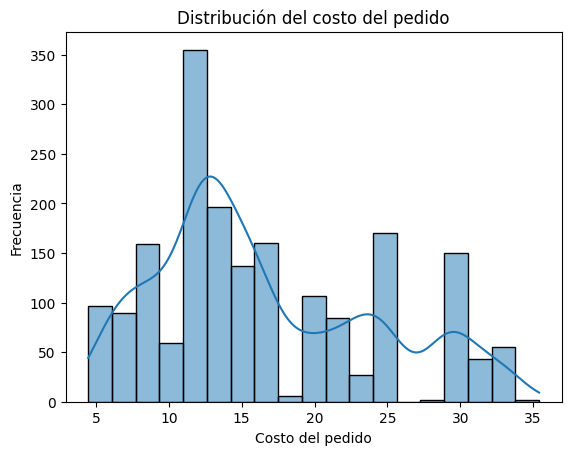

In [ ]:
# Análisis Univariado (Pregunta 6)
# Distribución del costo del pedido
sns.histplot(data=data, x='cost_of_the_order', kde=True)
plt.title('Distribución del costo del pedido')
plt.xlabel('Costo del pedido')
plt.ylabel('Frecuencia')
plt.show()

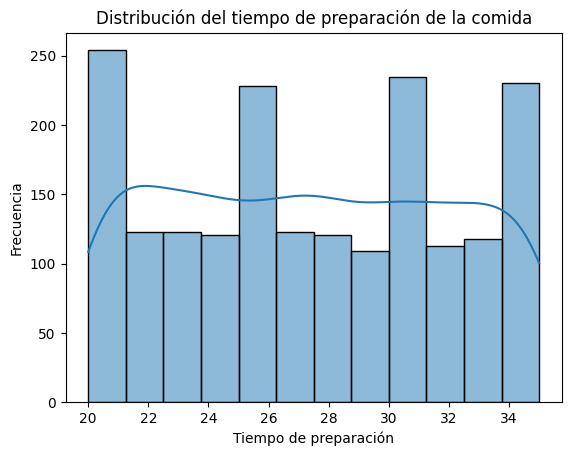

In [ ]:
# Distribución del tiempo de preparación de la comida
sns.histplot(data=data, x='food_preparation_time', kde=True)
plt.title('Distribución del tiempo de preparación de la comida')
plt.xlabel('Tiempo de preparación')
plt.ylabel('Frecuencia')
plt.show()


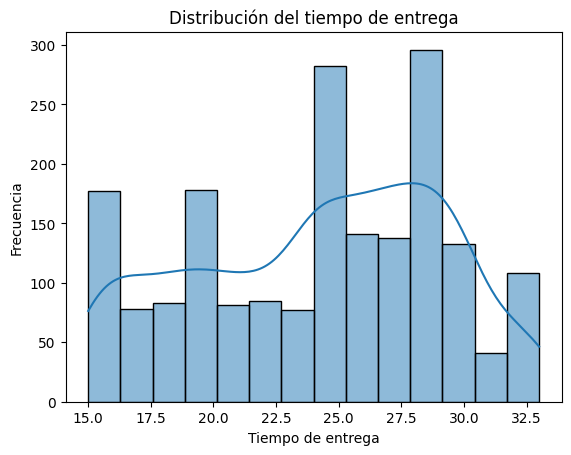

In [ ]:
# Distribución del tiempo de entrega
sns.histplot(data=data, x='delivery_time', kde=True)
plt.title('Distribución del tiempo de entrega')
plt.xlabel('Tiempo de entrega')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


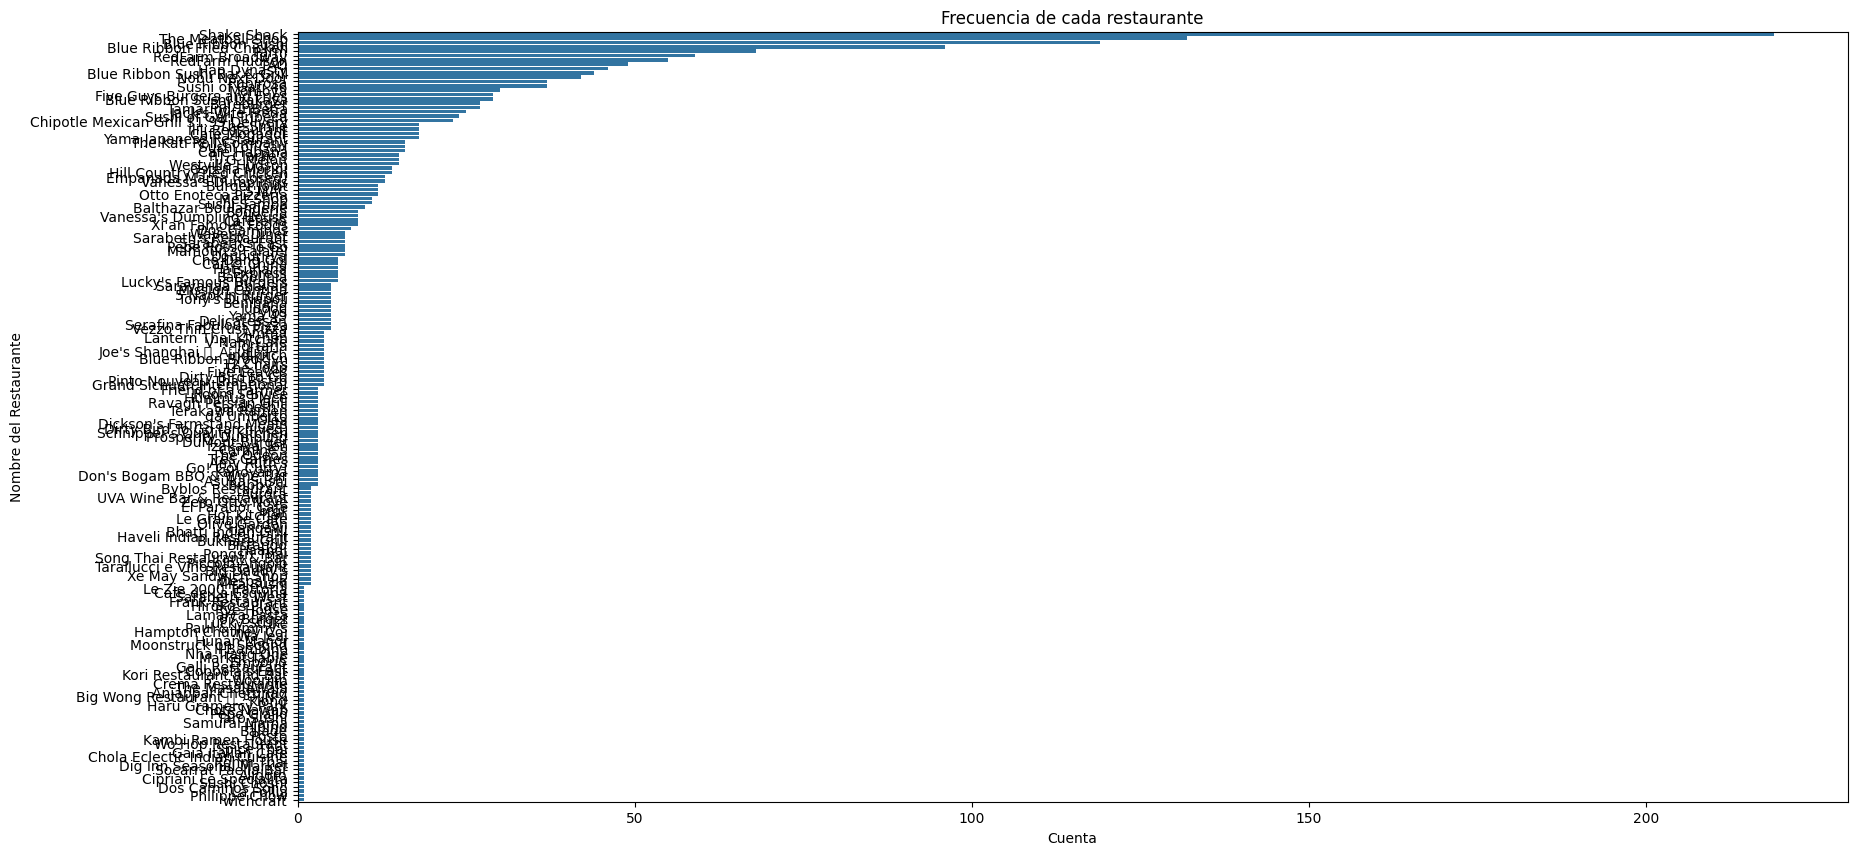

In [ ]:
# Frecuencia de cada restaurante
plt.figure(figsize=(20,10))
sns.countplot(y=data['restaurant_name'], order=data['restaurant_name'].value_counts().index)
plt.title('Frecuencia de cada restaurante')
plt.xlabel('Cuenta')
plt.ylabel('Nombre del Restaurante')
plt.show()

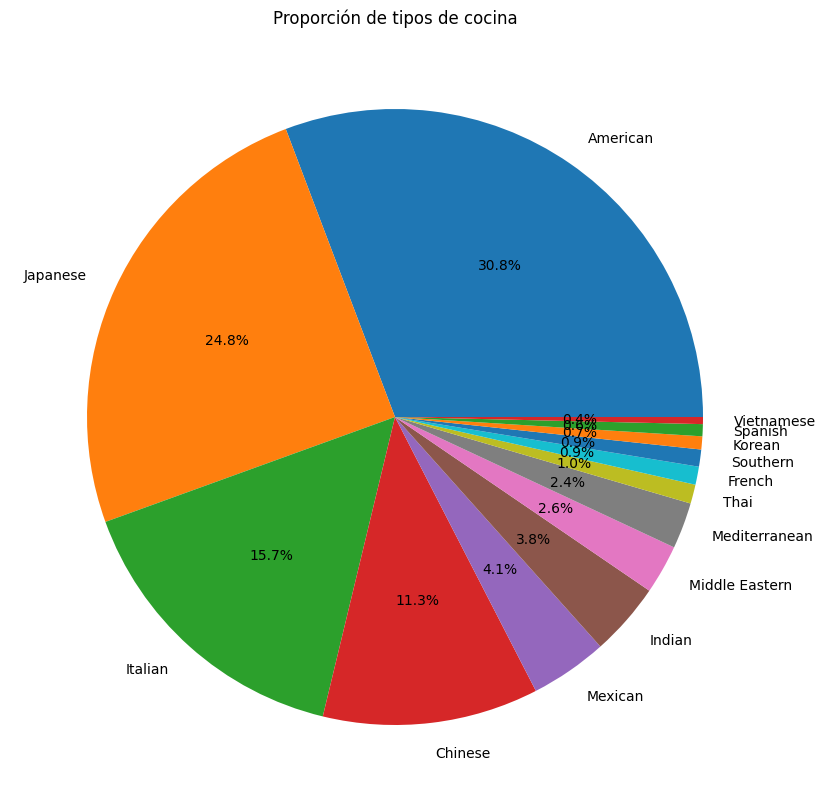

In [ ]:
# Proporción de tipos de cocina
plt.figure(figsize=(10,10))
data['cuisine_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporción de tipos de cocina')
plt.ylabel('')
plt.show()

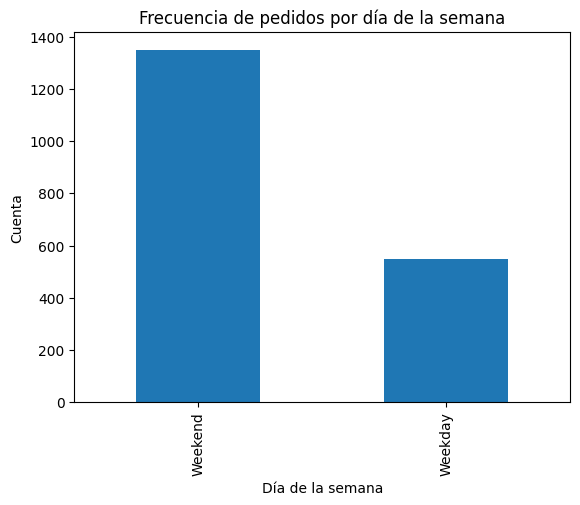

In [ ]:
# Frecuencia de pedidos por día de la semana
data['day_of_the_week'].value_counts().plot.bar()
plt.title('Frecuencia de pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cuenta')
plt.show()

In [ ]:
# Pregunta 7: ¿Cuáles son los 5 mejores restaurantes en términos de número de pedidos recibidos?
top_5_restaurants = data['restaurant_name'].value_counts().head(5)
print('Los 5 mejores restaurantes en términos de número de pedidos recibidos son:')
print(top_5_restaurants)

Los 5 mejores restaurantes en términos de número de pedidos recibidos son:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [ ]:
# Pregunta 8: ¿Cuál es el tipo de cocina más popular los fines de semana?
weekend_data = data[data['day_of_the_week'] == 'Weekend']
most_popular_cuisine_weekend = weekend_data['cuisine_type'].value_counts().idxmax()
print('El tipo de cocina más popular los fines de semana es:', most_popular_cuisine_weekend)


El tipo de cocina más popular los fines de semana es: American


In [ ]:
# Pregunta 9: ¿Qué porcentaje de los pedidos cuestan más de 20 dólares?
percentage_above_20 = (data[data['cost_of_the_order'] > 20].shape[0] / data.shape[0]) * 100
print(f'El {percentage_above_20:.2f}% de los pedidos cuestan más de 20 dólares.')

El 29.24% de los pedidos cuestan más de 20 dólares.


In [ ]:
# Pregunta 10: ¿Cuál es el tiempo promedio de entrega del pedido?
mean_delivery_time = data['delivery_time'].mean()
print('El tiempo promedio de entrega del pedido es:', mean_delivery_time)

El tiempo promedio de entrega del pedido es: 24.161749209694417


In [ ]:
# Pregunta 11: Encontrar los 3 clientes más frecuentes y el número de pedidos que realizaron
top_3_customers = data['customer_id'].value_counts().head(3)
print('Los 3 clientes más frecuentes y el número de pedidos que realizaron son:')
print(top_3_customers)

Los 3 clientes más frecuentes y el número de pedidos que realizaron son:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


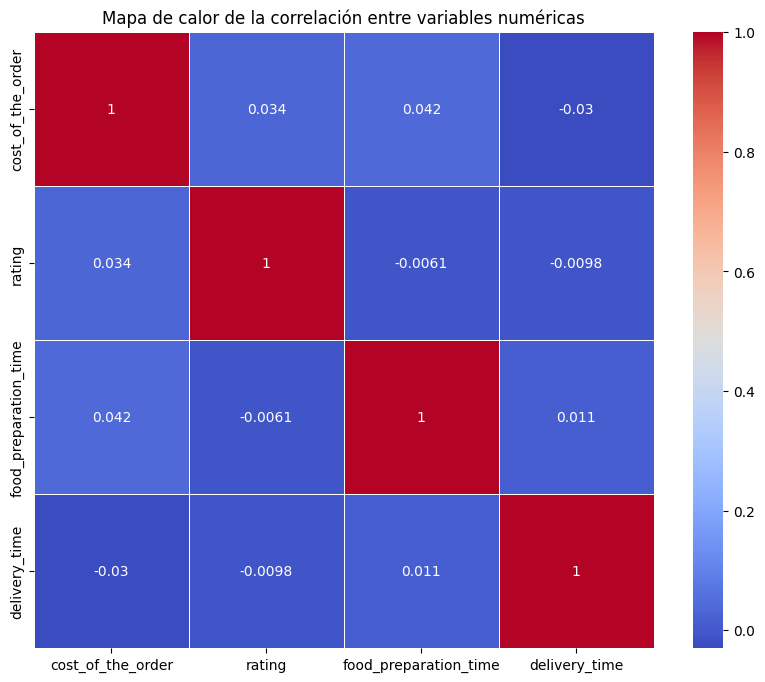

In [ ]:
# Análisis Multivariado (Pregunta 12)
# Seleccionar solo las columnas numéricas para calcular la correlación
numeric_data = data.select_dtypes(include=[np.number])
# Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de la correlación entre variables numéricas')
plt.show()


In [ ]:
# Pregunta 13: Restaurantes que cumplen con los criterios para la oferta promocional
restaurants_with_high_ratings = data.groupby('restaurant_name').filter(lambda x: x['rating'].count() > 50 and x['rating'].mean() > 4)
eligible_restaurants = restaurants_with_high_ratings['restaurant_name'].unique()
print('Los restaurantes que cumplen con los criterios para la oferta promocional son:')
print(eligible_restaurants)

Los restaurantes que cumplen con los criterios para la oferta promocional son:
['Blue Ribbon Fried Chicken' 'The Meatball Shop' 'Shake Shack'
 'Blue Ribbon Sushi']


In [ ]:
# Pregunta 14: Calcular los ingresos netos generados por la empresa en todos los pedidos
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0

data['revenue'] = data.apply(calculate_revenue, axis=1)
total_revenue = data['revenue'].sum()
print(f'Los ingresos netos generados por la empresa son: ${total_revenue:.2f}')

Los ingresos netos generados por la empresa son: $6166.30


In [ ]:
# Pregunta 15: ¿Qué porcentaje de pedidos tardan más de 60 minutos en ser entregados desde el momento en que se realiza el pedido?
total_time = data['food_preparation_time'] + data['delivery_time']
percentage_above_60 = (total_time[total_time > 60].shape[0] / data.shape[0]) * 100
print(f'El {percentage_above_60:.2f}% de los pedidos tardan más de 60 minutos en ser entregados.')

El 10.54% de los pedidos tardan más de 60 minutos en ser entregados.


In [ ]:
# Pregunta 16: Analizar el tiempo de entrega de los pedidos en días de semana y fines de semana
mean_delivery_time_weekday = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekend = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print(f'El tiempo promedio de entrega en días de semana es: {mean_delivery_time_weekday:.2f} minutos')
print(f'El tiempo promedio de entrega en fines de semana es: {mean_delivery_time_weekend:.2f} minutos')

El tiempo promedio de entrega en días de semana es: 28.34 minutos
El tiempo promedio de entrega en fines de semana es: 22.47 minutos


In [ ]:
# Pregunta 17: Conclusiones y recomendaciones
conclusions = '''
Conclusiones:
1. El restaurante Shake Shack es el más popular.
2. Los tipos de cocina más populares son Americana y Japonesa.
3. Casi el 39% de los pedidos no tienen calificación.
4. La mayoría de los pedidos cuestan menos de 20 dólares.
5. Los tiempos de preparación y entrega de la comida son razonablemente consistentes.

Recomendaciones:
1. Implementar incentivos para alentar a los clientes a calificar sus pedidos.
2. Analizar más a fondo los pedidos no calificados para entender las razones detrás de la falta de calificaciones.
3. Ofrecer promociones específicas en los restaurantes menos populares para equilibrar la demanda.
4. Optimizar la ruta y el proceso de entrega para reducir el tiempo total de entrega.
5. Fomentar la diversidad en los tipos de cocina disponibles para atraer a una gama más amplia de clientes.
'''

print(conclusions)


Conclusiones:
1. El restaurante Shake Shack es el más popular.
2. Los tipos de cocina más populares son Americana y Japonesa.
3. Casi el 39% de los pedidos no tienen calificación.
4. La mayoría de los pedidos cuestan menos de 20 dólares.
5. Los tiempos de preparación y entrega de la comida son razonablemente consistentes.

Recomendaciones:
1. Implementar incentivos para alentar a los clientes a calificar sus pedidos.
2. Analizar más a fondo los pedidos no calificados para entender las razones detrás de la falta de calificaciones.
3. Ofrecer promociones específicas en los restaurantes menos populares para equilibrar la demanda.
4. Optimizar la ruta y el proceso de entrega para reducir el tiempo total de entrega.
5. Fomentar la diversidad en los tipos de cocina disponibles para atraer a una gama más amplia de clientes.

